https://docs.xlwings.org/en/stable/quickstart.html

In [10]:
import xlwings as xw
import pandas as pd

In [24]:
xw.sheets

Sheets([<Sheet [Book1]Sheet1>])

In [74]:
xw.books.active.save(r"c:\tmp.xlsx")
fn = xw.books.active.fullname
fn

'c:\\tmp.xlsx'

# Cell & Range

In [46]:
def excel_col(i):
    if i <= 26: return chr(64 + i)
    else:
        m = (i-1) // 26
        n = (i-1) % 26 + 1
        return excel_col(m) + excel_col(n)
        
    
excel_col(27*26)

'ZZ'

In [4]:
xw.Range('A1').value 

't1'

In [86]:
rg = xw.Range('A1').expand()
rg

<Range [tmp.xlsx]Sheet1!$A$1:$B$4>

In [47]:
xw.Range('B1').expand('down').value

['t2', 1.0, 2.0, 2.0]

In [48]:
xw.Range('A1').expand('right').value

['t1', 't2']

# DataFrame

In [13]:
df = xw.Range('A1').options(pd.DataFrame, expand='table').value
df

,t2
t1,
a,1.0
a,2.0
b,2.0


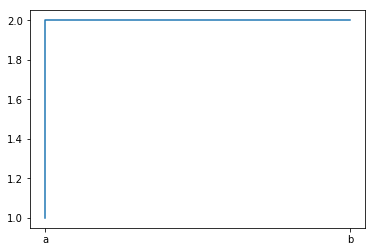

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df)

In [32]:
xw.sheets.add("plot")

<Sheet [Book1]plot>

In [41]:
xw.sheets.active.pictures.add(fig, name='DataPlot', update=True)

<Picture 'DataPlot' in <Sheet [Book1]plot>>

# api
`pywin32` on Windows and `appscript` on Mac (ref: https://docs.xlwings.org/en/stable/missing_features.html )

In [60]:
sht_api = xw.sheets.api
sht_api

   # format

In [61]:
# https://docs.xlwings.org/en/stable/missing_features.html
sht.range('A1').api.WrapText = True

# pywin32 & Pivot
https://gist.github.com/pythonexcels/3767898

In [52]:
import win32com.client as win32
win32c = win32.constants
win32c

In [84]:
win32c.xlDatabase # int

1

In [64]:
excel = win32.gencache.EnsureDispatch('Excel.Application')
excel

<win32com.gen_py.Microsoft Excel 15.0 Object Library._Application instance at 0x2583685030352>

In [76]:
wb = excel.Workbooks.Open(fn)
wb

<win32com.gen_py.None.Workbook>

In [137]:
excel.ActiveWorkbook

<win32com.gen_py.None.Workbook>

In [77]:
ws = wb.Sheets('Sheet1')
ws

<win32com.gen_py.Microsoft Excel 15.0 Object Library._Worksheet instance at 0x2583680609528>

In [79]:
xldata = ws.UsedRange.Value
xldata

(('t1', 't2'), ('a', 1.0), ('a', 2.0), ('b', 2.0))

In [100]:
print(type(rg))
rg.value

<class 'xlwings.main.Range'>


[['t1', 't2'], ['a', 1.0], ['a', 2.0], ['b', 2.0]]

https://docs.microsoft.com/en-us/dotnet/api/microsoft.office.interop.excel.pivotcaches?view=excel-pia#methods

In [106]:
pcs = wb.PivotCaches() 
pcs 

<win32com.gen_py.Microsoft Excel 15.0 Object Library.PivotCaches instance at 0x2583715469296>

In [131]:
xw.books.active.api.PivotCaches

<bound method _Workbook.PivotCaches of <win32com.gen_py.Microsoft Excel 15.0 Object Library._Workbook instance at 0x2583715500496>>

https://docs.xlwings.org/en/stable/api.html#xlwings.Range.get_address

In [96]:
src_data = rg.get_address(include_sheetname=True) 
src_data

<class 'xlwings.main.Range'>


'Sheet1!$A$1:$B$4'

In [118]:
pc = wb.PivotCaches().Add(SourceType=win32c.xlDatabase, SourceData=src_data)
pc

<win32com.gen_py.Microsoft Excel 15.0 Object Library.PivotCache instance at 0x2583711547856>

https://docs.microsoft.com/en-us/office/vba/api/excel.pivotcache.saveasodc  
Saves the PivotTable cache source as an Microsoft Office Data Connection file.

In [160]:
pc.SaveAsODC

<bound method PivotCache.SaveAsODC of <win32com.gen_py.Microsoft Excel 15.0 Object Library.PivotCache instance at 0x2583711547856>>

In [134]:
xw.books.active.api.PivotCaches().Add(SourceType=win32c.xlDatabase, SourceData=src_data)

<win32com.gen_py.Microsoft Excel 15.0 Object Library.PivotCache instance at 0x2583710761088>

https://stackoverflow.com/questions/22532019/creating-pivot-table-in-excel-using-python

In [123]:
xw.Range('A1').get_address(include_sheetname=True)

'Sheet1!$A$1'

In [154]:
win32c.xlPivotTableVersion10

1

In [151]:
type(pc)

win32com.gen_py.00020813-0000-0000-C000-000000000046x0x1x8.PivotCache.PivotCache

In [161]:
PivotTable = pc.CreatePivotTable(TableDestination='pivot!R4C1',TableName="pivot1")
type(PivotTable) # stuck, to be continue...

NoneType

https://docs.microsoft.com/en-us/dotnet/api/microsoft.office.interop.excel.pivotcache.createpivottable?view=excel-pia

In [150]:
PivotTable.PivotFields('Name').Orientation = win32c.xlRowField
PivotTable.PivotFields('Name').Position = 1
PivotTable.PivotFields('Gender').Orientation = win32c.xlPageField
PivotTable.PivotFields('Gender').Position = 1
PivotTable.PivotFields('Gender').CurrentPage = 'M'
PivotTable.PivotFields('Country').Orientation = win32c.xlColumnField
PivotTable.PivotFields('Country').Position = 1
PivotTable.PivotFields('Country').Subtotals = [False, False, False, False, False, False, False, False, False, False, False, False]
PivotTable.PivotFields('Sign').Orientation = win32c.xlColumnField
PivotTable.PivotFields('Sign').Position = 2

DataField = PivotTable.AddDataField(PivotTable.PivotFields('Amount'))
DataField.NumberFormat = '#\'##0.00'

AttributeError: 'NoneType' object has no attribute 'PivotFields'

In [117]:
wb.PivotCaches().Create(SourceType=win32c.xlDatabase, SourceData=src_data)

<win32com.gen_py.Microsoft Excel 15.0 Object Library.PivotCache instance at 0x2583711005832>

https://docs.microsoft.com/en-us/office/vba/api/excel.pivotcache.refreshm

In [42]:
xw.sheets.add("pivot")

<Sheet [Book1]pivot>